# Задание

<b>1. (2 балла)</b> Постройте двумерный график вашей любимой функции (если такой нет, полюбите функцию из https://docs.scipy.org/doc/numpy/reference/routines.math.html). Отметьте на этом графике максимальное и минимальное значение

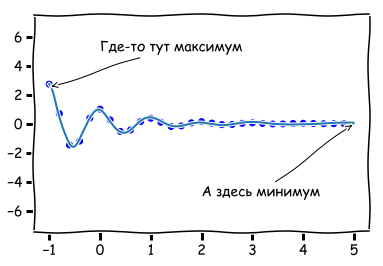

In [81]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(-1.0, 5.0, 0.2)
t2 = np.arange(-1.0, 5.0, 0.01)

f_t1 = f(t1)
f_t2 = f(t2)

with plt.xkcd():
    plt.ylim(-7.5, 7.5)
    plt.annotate('Где-то тут максимум', xy=(-1, 2.5), arrowprops=dict(arrowstyle='->'), xytext=(0, 5))
    plt.annotate('А здесь минимум', xy=(5, 0), arrowprops=dict(arrowstyle='->'), xytext=(2, -5))
    plt.plot(t1, f_t1, 'bo', t2, f_t2);



<b>2. (2 балла)</b> Нормализуйте вектор y-координат. Для этого отнимите среднее и поделите на стандартное отклонение. Постройте гистограмму значений получившегося вектора. На гистограмме отметьте среднее и точки $-\sigma$ , $+\sigma$

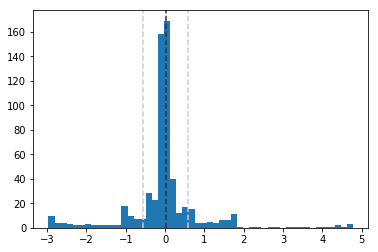

In [85]:
mean = np.mean(f_t2)
std  = np.std(f_t2)
y = (f_t2 - mean)/std

plt.hist(y, bins=50)
plt.axvline(x=mean, color="#333333", linestyle="dashed")
plt.axvline(x=(mean+std), color="#cccccc", linestyle="dashed")
plt.axvline(x=(mean-std), color="#cccccc", linestyle="dashed")


<b>3. (3 балла)</b> Николай Иванович играет в игру: он берет из мешка с числами от 1 до 1000 
    случайное число, записывает его на бумажке и возвращает число в мешок. Так он поступает 1000 раз.
    После этого Николай Иванович считает, сколько разных чисел у него на бумажке. Посчитайте и вы ;)
    
Постройте график, где по X будут числа в порядке убывания количества упоминаний на бумажке, а по Y - количество упоминаний. Уместно построить график в логарифмической шкале по X

<b>+3 балла </b>Проверьте, что выборки i.i.d. (independent, identically distributed).

Разных чисел у него на бумажке: 624


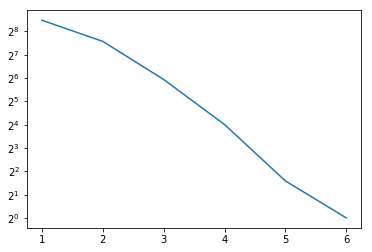

In [221]:
import random as rnd
import collections

basket = list(range(1, 1001))
exps_count = 1000
exps = list()

for i in range(0, exps_count):
    np.random.shuffle(basket)
    exps.append(basket[0])

print("Разных чисел у него на бумажке: {}".format(len(set(exps))))
value_counts = collections.Counter(exps)
dist_counts = {}
for value, count in value_counts.items():
    dist_counts[count] = dist_counts.get(count, 0) + 1

dist = np.array(list(dist_counts.items()), dtype=[('a', int), ('b', int)])
sorted_dist = np.array([[pair[0], pair[1]] for pair in np.sort(dist, order='a')]).flatten()
x, y = sorted_dist[::2], sorted_dist[1::2]
plt.plot(x, y) 
plt.yscale('log', basey=2)


<b>4. (2 балла)</b> постройте трехмерный график вашей любимой функции от 2-х переменных

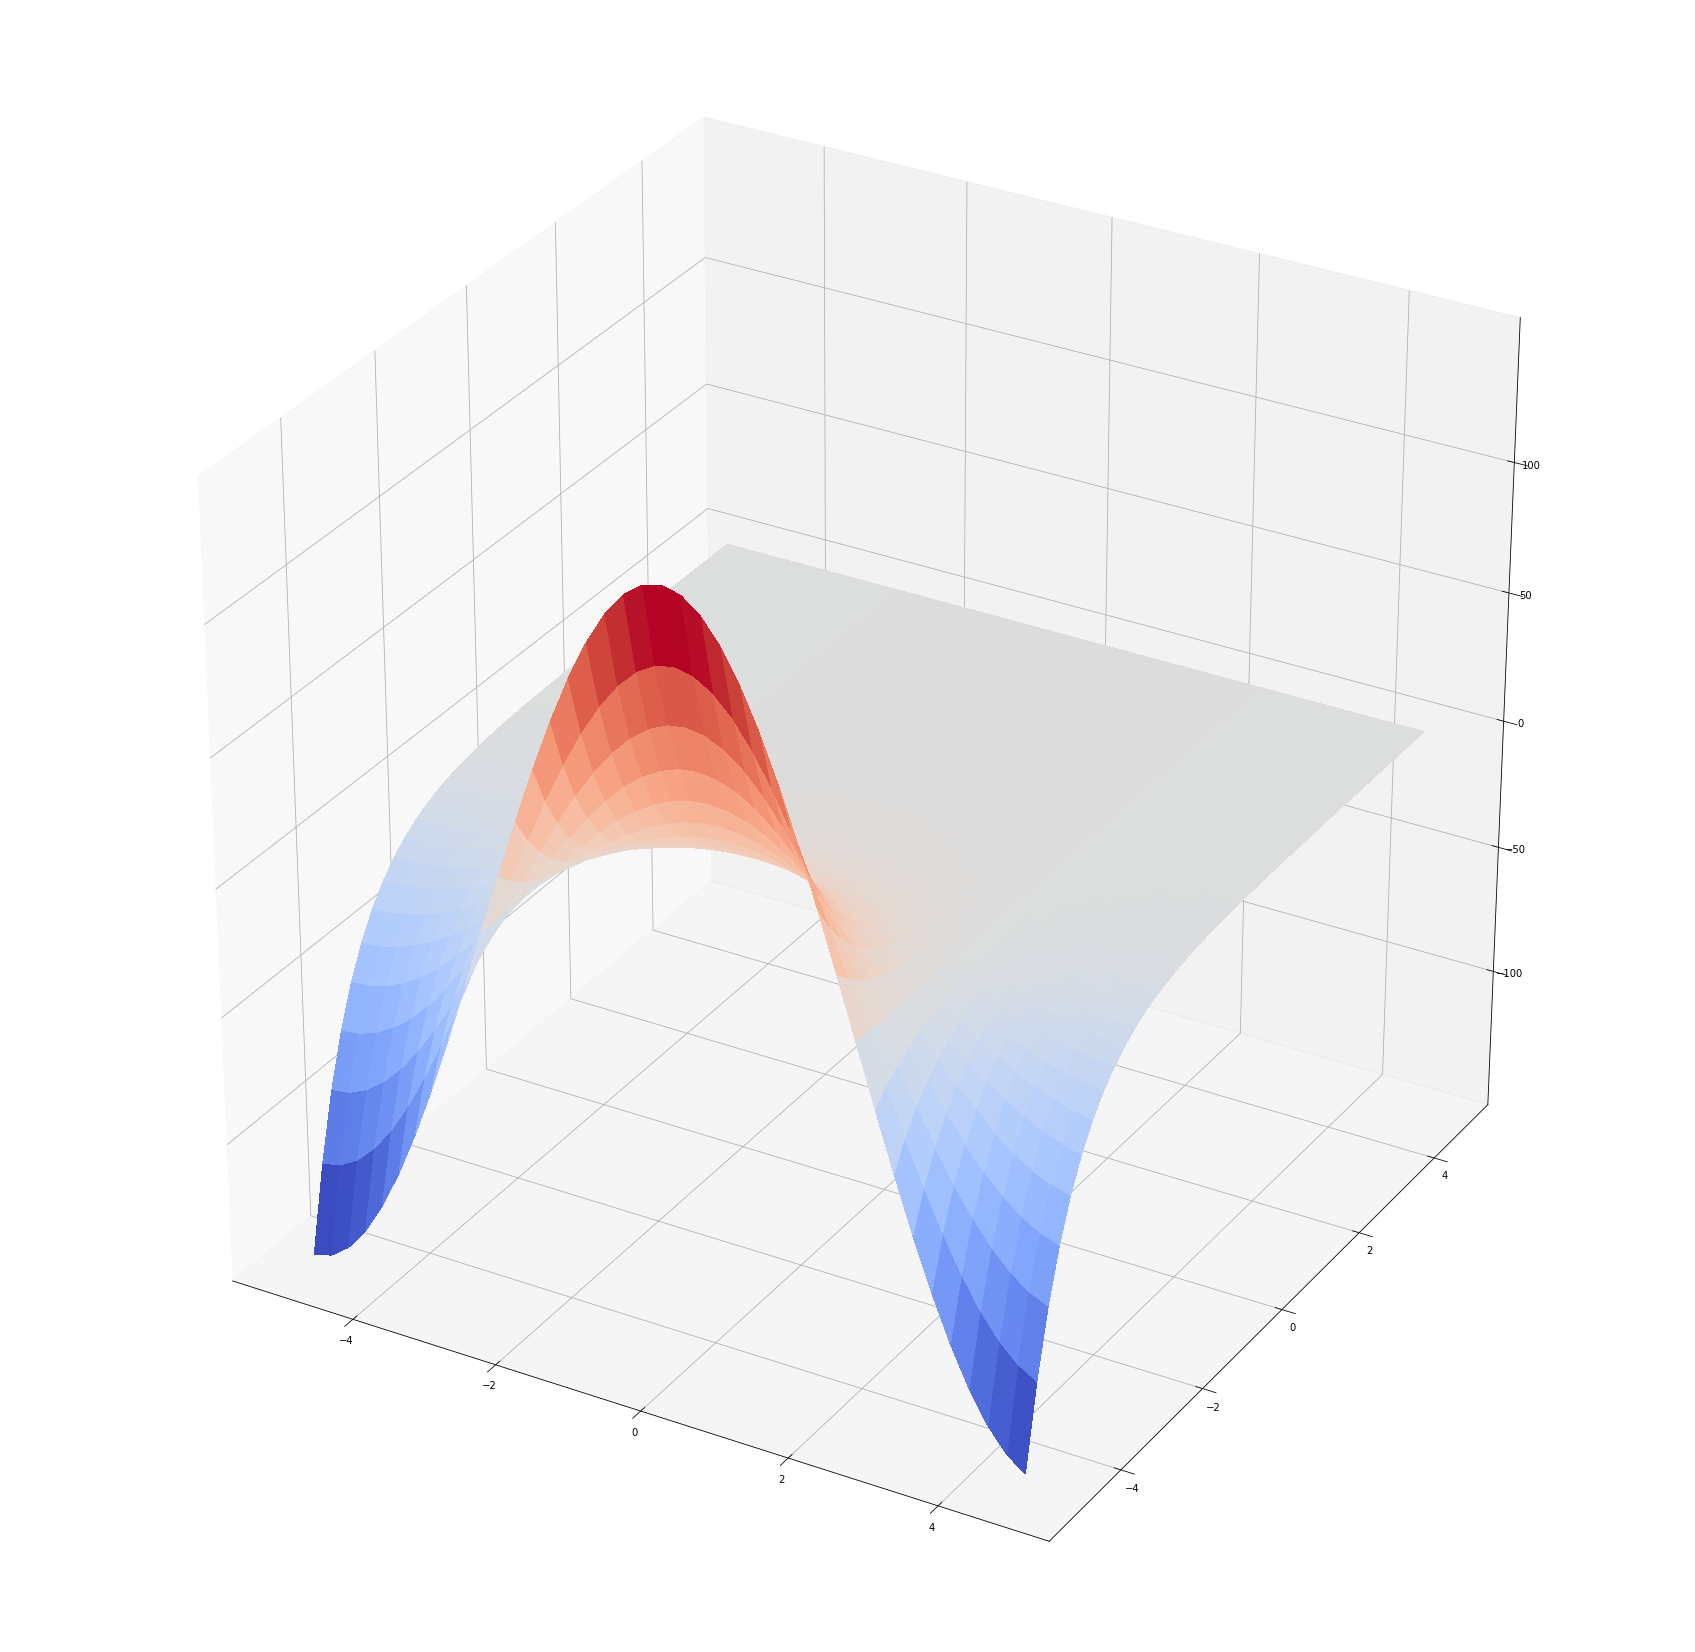

In [251]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig = plt.figure()
fig.set_size_inches(30, 30)
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Z = np.exp(-Y) * np.cos(0.2*np.pi*X)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
